<a href="https://colab.research.google.com/github/KsBrume/AI_math/blob/main/gabor_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (1280, 960, 3)
Image height 1280
Image width 960
dimensions of image 3


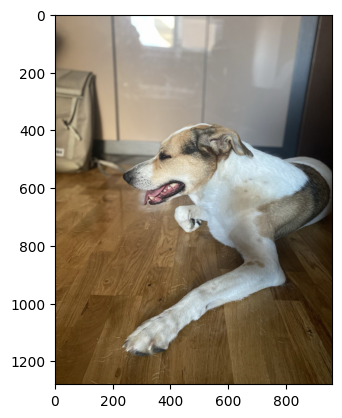

In [5]:
# the function of a Gabor filter is a two dimensional Gaussian times a sine wave.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import ndimage as ndi  # for convolition (multidimensional image processing)
from skimage.filters import gabor_kernel

picture = plt.imread('/content/drive/MyDrive/pics/photo_2025-02-20_14-50-04.jpg')
print('Type of the image : ', type(picture))
print(f'Shape of the image : {picture.shape}')
print(f'Image height {picture.shape[0]}')
print(f'Image width {picture.shape[1]}')
print(f'dimensions of image {picture.ndim}')
plt.imshow(picture)

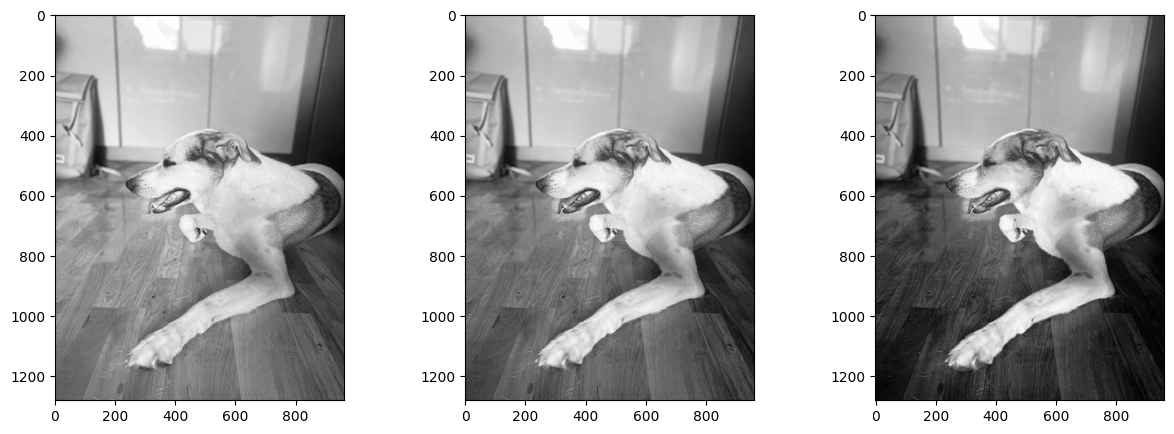

In [2]:
# each channel

R = picture[:, :, 0]  # red channel
G = picture[:, :, 1]  # green chanel
B = picture[:, :, 2]  # blue channel

fig, subs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
subs[0].imshow(R, cmap=cm.Greys_r)
subs[1].imshow(G, cmap=cm.Greys_r)
subs[2].imshow(B, cmap=cm.Greys_r)

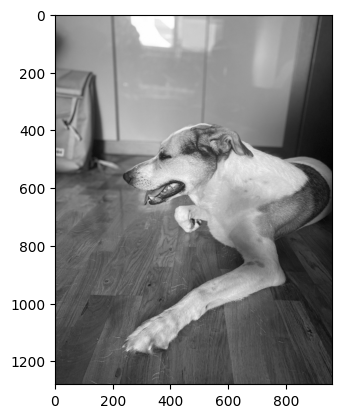

In [3]:
# to convert initial image to grayscale the output should have integer values between 0.255

R_COEF = 0.2989
G_COEF = 0.5870
B_COEF = 0.1140

r1 = np.around(R_COEF * R + G_COEF * G + B_COEF * B)
r1 = r1.astype(int)
g1 = np.around(R_COEF * R + G_COEF * G + B_COEF * B)
g1 = g1.astype(int)
b1 = np.around(R_COEF * R + G_COEF * G + B_COEF * B)
b1 = b1.astype(int)
gray_image = np.dstack((r1, g1, b1))
plt.imshow(gray_image)


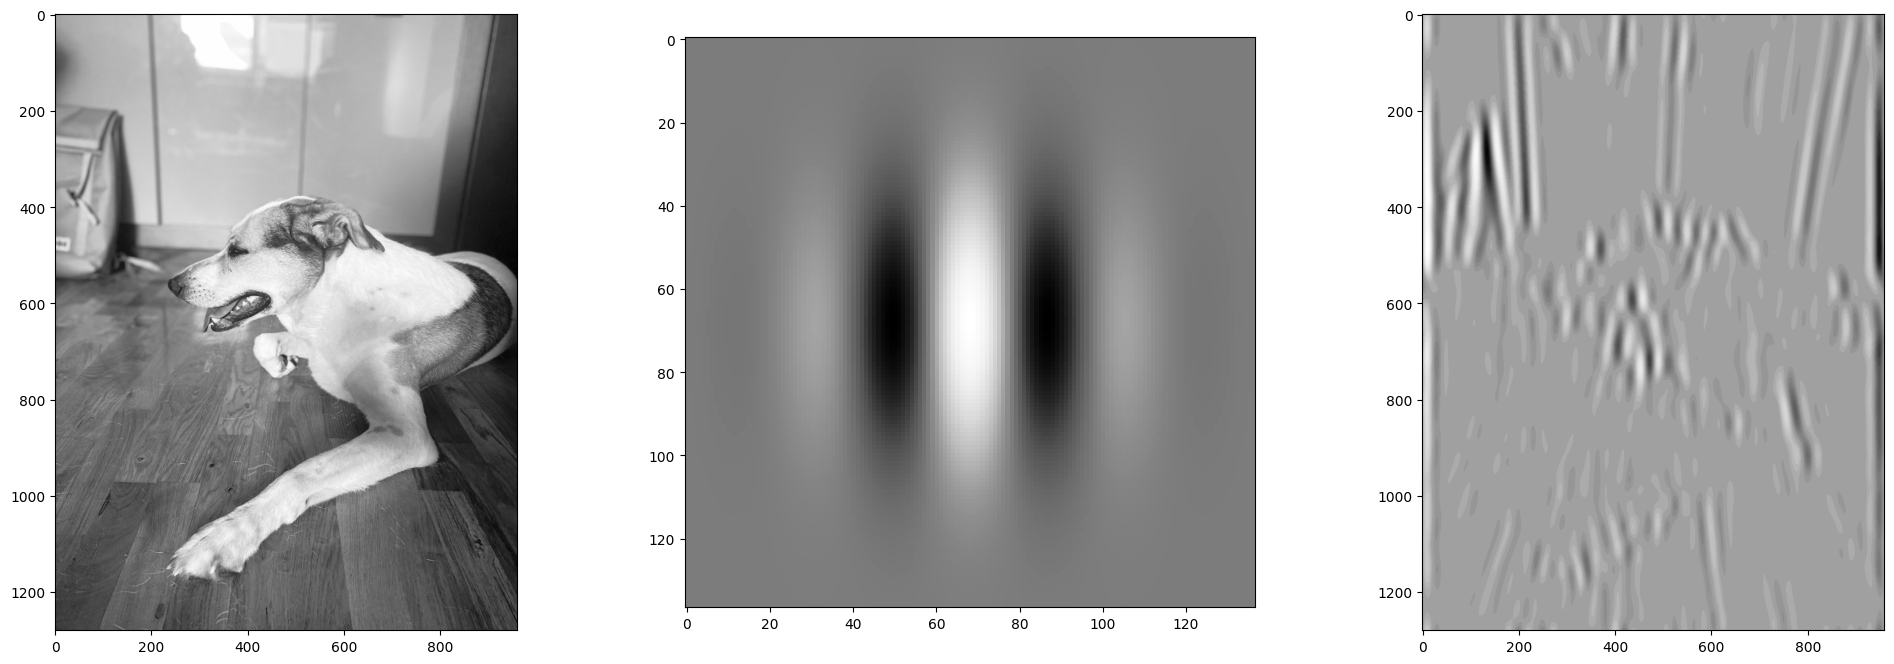

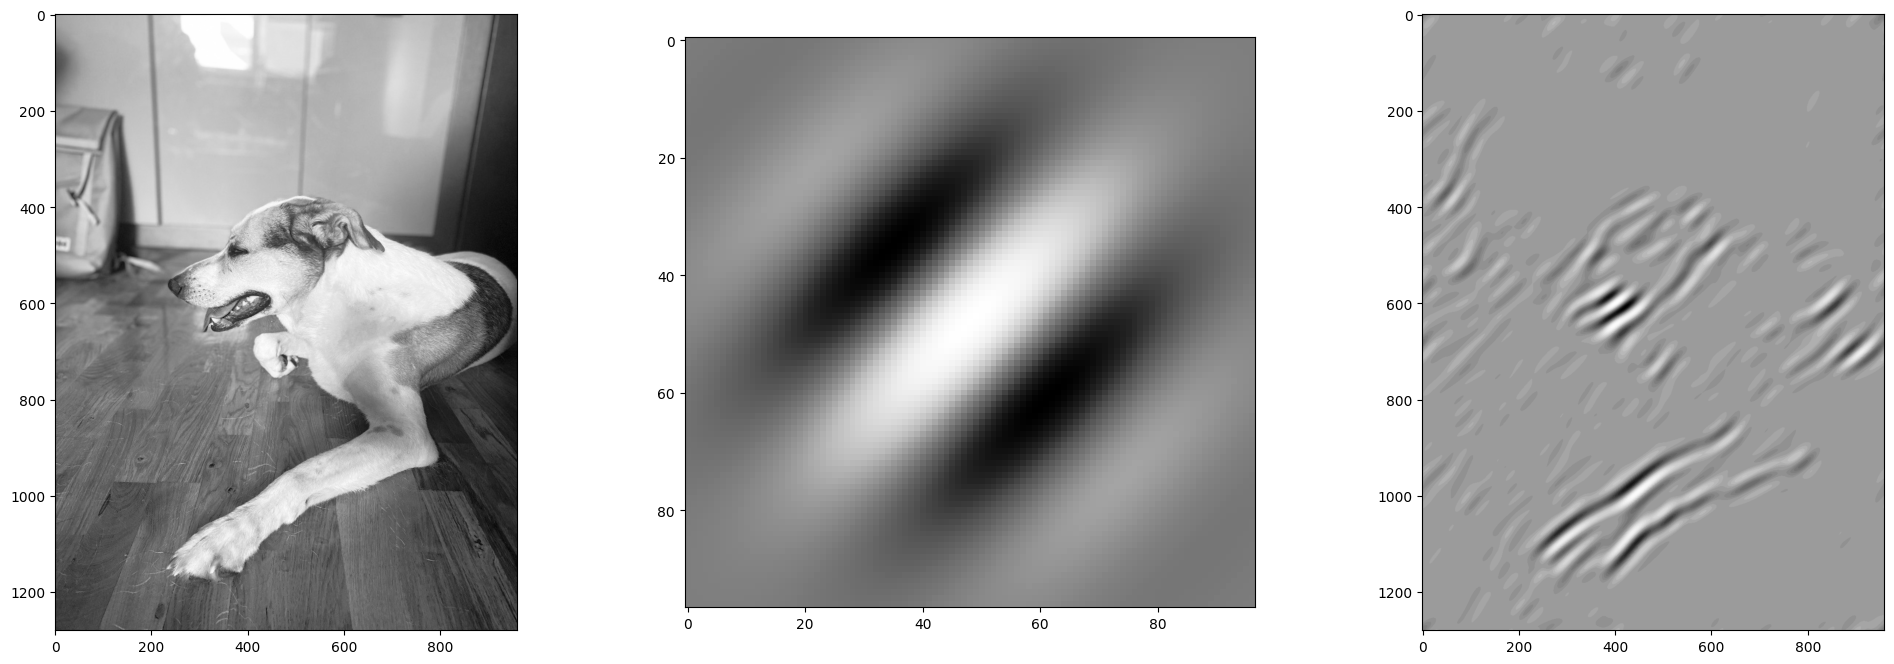

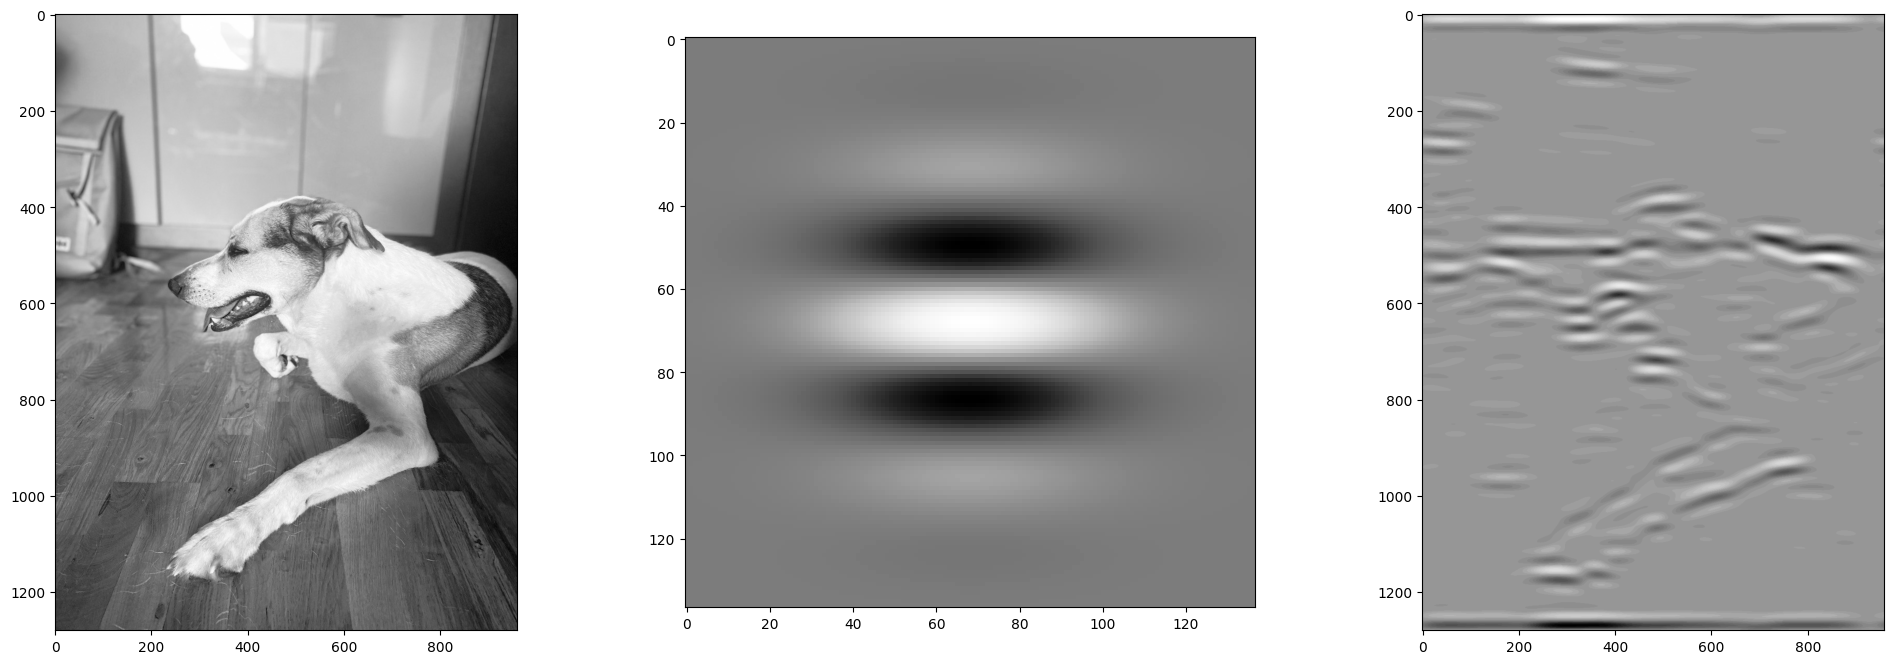

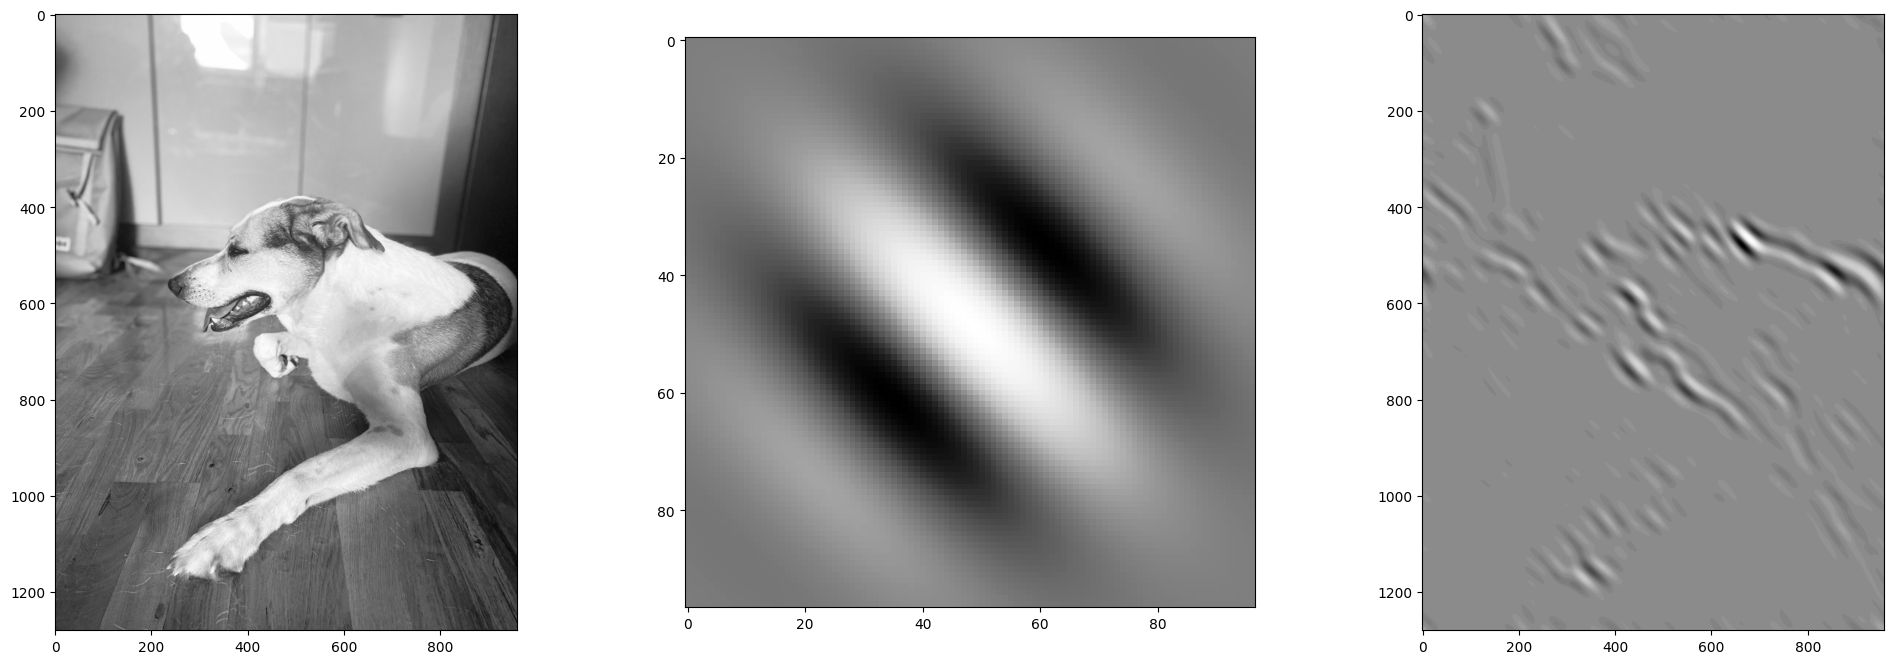

In [6]:
# the frequency desired in the texture

frequency = 0.025

# create filters with chosen frequency and different orientations
filter_matrix_0 = gabor_kernel(frequency, theta = 0, bandwidth = 1, dtype = np.complex128)
filter_matrix_45 = gabor_kernel(frequency, theta = np.pi / 4, bandwidth = 1, dtype = np.complex128)
filter_matrix_90 = gabor_kernel(frequency, theta = np.pi / 2, bandwidth = 1, dtype = np.complex128)
filter_matrix_135 = gabor_kernel(frequency, theta = 3 * np.pi / 4, bandwidth = 1, dtype=np.complex128)

# get the real part of the filter
filter_matrix_0 = np.real(filter_matrix_0)
filter_matrix_45 = np.real(filter_matrix_45)
filter_matrix_90 = np.real(filter_matrix_90)
filter_matrix_135 = np.real(filter_matrix_135)

# choose image to filter
image = r1
filtered_image_0 = ndi.convolve(image, filter_matrix_0, mode='wrap')
filtered_image_45 = ndi.convolve(image, filter_matrix_45, mode = 'wrap')
filtered_image_90 = ndi.convolve(image, filter_matrix_90, mode='wrap')
filtered_image_135 = ndi.convolve(image, filter_matrix_135, mode='wrap')

data_dict = {0: [filter_matrix_0, filtered_image_0],
             45: [filter_matrix_45, filtered_image_45],
             90: [filter_matrix_90, filtered_image_90],
             135: [filter_matrix_135, filtered_image_135]}

# results
for theta in [0, 45, 90, 135]:
    fig, subs = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))
    subs[0].imshow(G, cmap=cm.Greys_r)
    subs[1].imshow(data_dict[theta][0], cmap=cm.Greys_r)
    subs[2].imshow(data_dict[theta][1], cmap=cm.Greys_r)


